In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
def visualize_preds(table, y_true, y_pred, title):
    scores = []
    f = plt.figure(figsize = (8,8))
    cf = confusion_matrix(y_true, y_pred)
    sb.heatmap(cf, fmt='.0f', annot=True)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    scores.append(accuracy)
    scores.append(precision)
    scores.append(recall)
    scores.append(f1)
    scores = pd.DataFrame(scores)
    table = pd.concat([table,scores], axis = 1)

    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy, precision, recall, f1)

    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)

    return table

In [4]:
table1 = pd.DataFrame()
table2 = pd.DataFrame()

## Importing data

In [5]:
#IMPORTING CLEANED TRAIN DATASET USING OVERSAMPLING
oversampled_train = pd.read_csv("oversampled_train.csv", index_col=0)
oversampled_train

,mmbtu,daren,http,robert,sitara,texas,april,july,gary,tenaska,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
enron,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
#IMPORTING CLEANED TRAIN DATASET USING UNDERSAMPLING
undersampled_train = pd.read_csv("undersampled_train.csv", index_col=0)
undersampled_train

,mmbtu,daren,http,robert,sitara,texas,april,july,gary,tenaska,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
enron,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
#IMPORTING CLEANED TRAIN DATASET USING SMOTEENN
smoteenn_train = pd.read_csv("smoteenn_train.csv", index_col=0)
smoteenn_train

,mmbtu,daren,http,robert,sitara,texas,april,july,gary,tenaska,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
enron,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
0,0,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
#IMPORTING CLEANED TRAIN DATASET USING SMOTETOMEK
smote_tomek_train = pd.read_csv("smote_tomek_train.csv", index_col=0)
smote_tomek_train

,mmbtu,daren,http,robert,sitara,texas,april,july,gary,tenaska,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
enron,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
#IMPORTING CLEANED TEST DATASET
test = pd.read_csv("test_data.csv", index_col = 0)
test

,mmbtu,daren,http,robert,sitara,texas,april,july,gary,tenaska,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
enron,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 1) Naive Bayes Classification on Oversampled Train

In [10]:
#Assign x and y value
x_train = oversampled_train.drop(['Label'], axis = 1) # Remove the response variable
y_train = oversampled_train['Label']
x_test = test.drop(['Label'], axis = 1) # Remove the response variable
y_test = test['Label']

In [11]:
#Calculate the odds of an email being spam
print("The odds of an email being spam in oversampled train dataset is : ",
      y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1]))

#Perform the logistics regression
NB1 = GaussianNB()

#Fit the data
NB1.fit(x_train, y_train)

#Print out the mean acuuracy
print("The overall classification accuracy \t\t\t\t: ", NB1.score(x_test, y_test))

The odds of an email being spam in oversampled train dataset is :  0.5
The overall classification accuracy 				:  0.8859903381642512


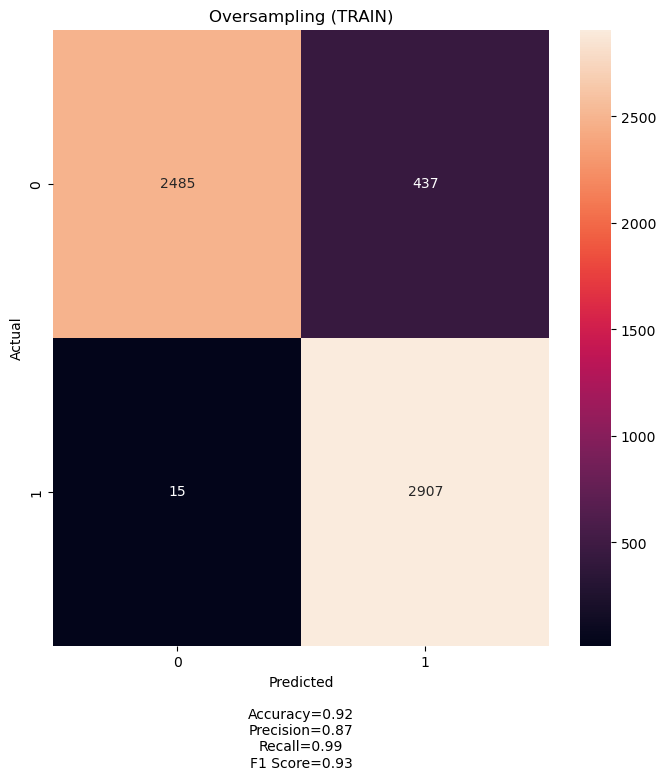

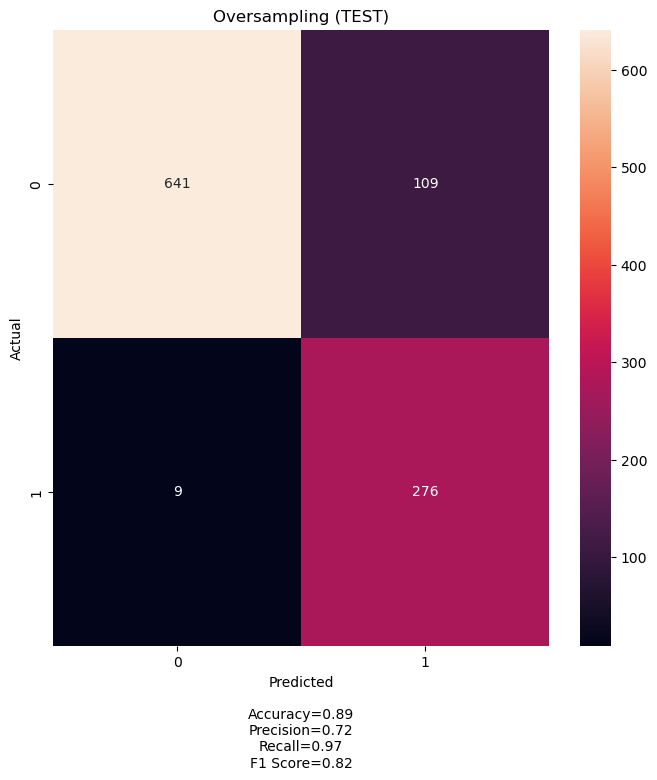

In [12]:
#Predict the data
y_train_pred = NB1.predict(x_train)
y_test_pred = NB1.predict(x_test)

#Visualizing the data
table1 = visualize_preds(table1, y_train, y_train_pred, title = 'Oversampling (TRAIN)')
table2 = visualize_preds(table2, y_test, y_test_pred, title = 'Oversampling (TEST)')

## 2) Naive Bayes Classification on Undersampled Train

In [13]:
#Assign x and y value
x_train = undersampled_train.drop(['Label'], axis = 1) # Remove the response variable
y_train = undersampled_train['Label']
x_test = test.drop(['Label'], axis = 1) # Remove the response variable
y_test = test['Label']

In [14]:
#Calculate the odds of an email being spam
print("The odds of an email being spam in undersampled train dataset is : ",
      y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1]))

#Perform the logistics regression
NB2 = GaussianNB()

#Fit the data
NB2.fit(x_train, y_train)

#Print out the mean acuuracy
print("The overall classification accuracy \t\t\t\t : ", NB2.score(x_test, y_test))

The odds of an email being spam in undersampled train dataset is :  0.5
The overall classification accuracy 				 :  0.8859903381642512


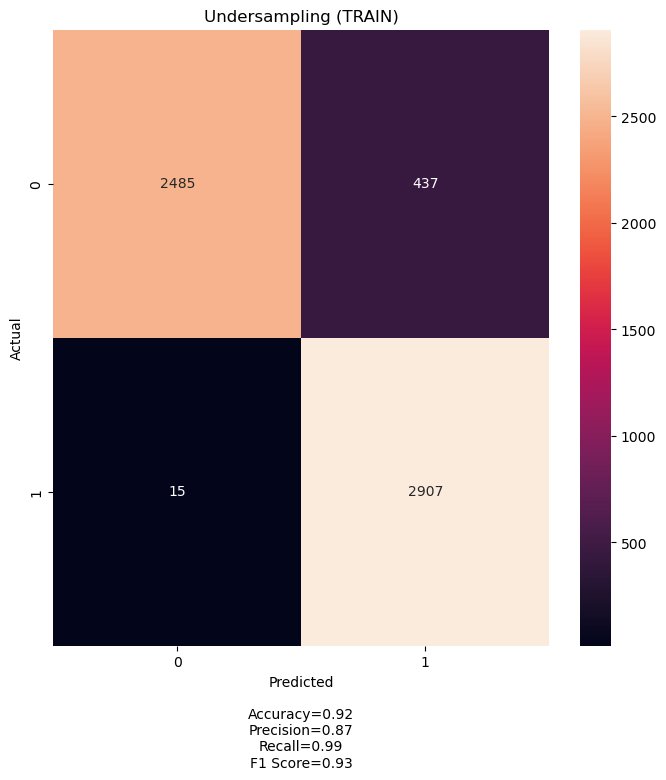

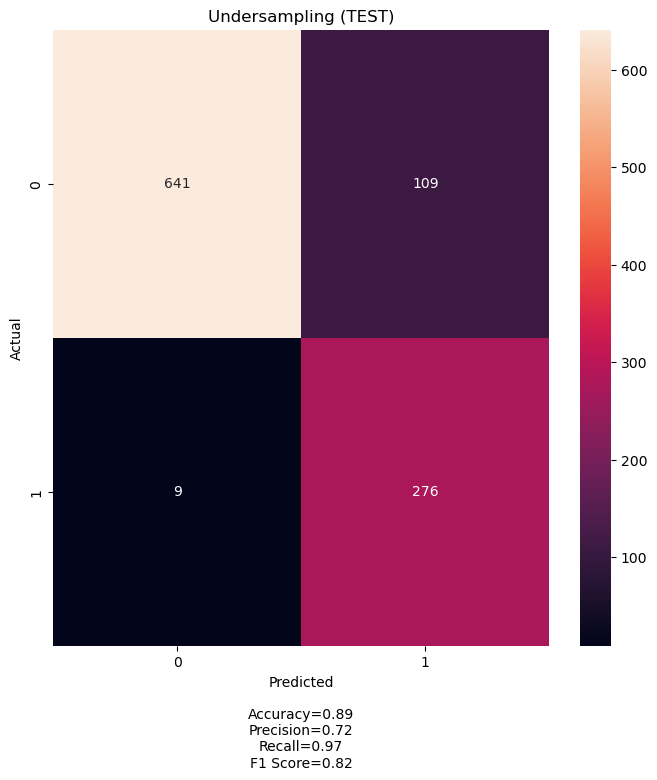

In [15]:
#Predict the data
y_train_pred = NB2.predict(x_train)
y_test_pred = NB2.predict(x_test)

#Visualizing the data
table1 = visualize_preds(table1, y_train, y_train_pred, title = 'Undersampling (TRAIN)')
table2 = visualize_preds(table2, y_test, y_test_pred, title = 'Undersampling (TEST)')

## 3) Naive Bayes Classification on SMOTEENN Train

In [16]:
#Assign x and y value
x_train = smoteenn_train.drop(['Label'], axis = 1) # Remove the response variable
y_train = smoteenn_train['Label']
x_test = test.drop(['Label'], axis = 1) # Remove the response variable
y_test = test['Label']

In [17]:
#Calculate the odds of an email being spam
print("The odds of an email being spam in SMOTEENN train dataset is : ",
      y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1]))

#Perform the logistics regression
NB3 = GaussianNB()

#Fit the data
NB3.fit(x_train, y_train)

#Print out the mean acuuracy
print("The overall classification accuracy \t\t\t     : ", NB3.score(x_test, y_test))

The odds of an email being spam in SMOTEENN train dataset is :  0.5389772074315266
The overall classification accuracy 			     :  0.8869565217391304


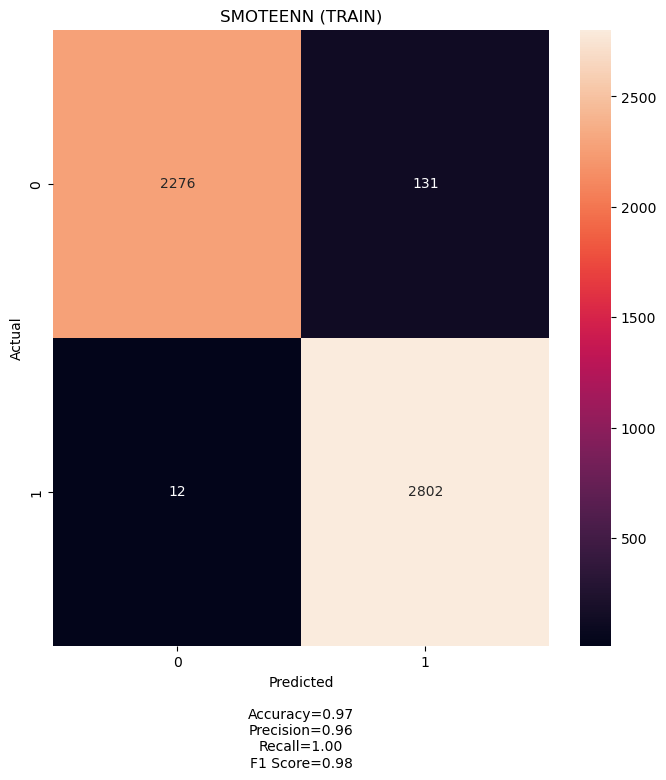

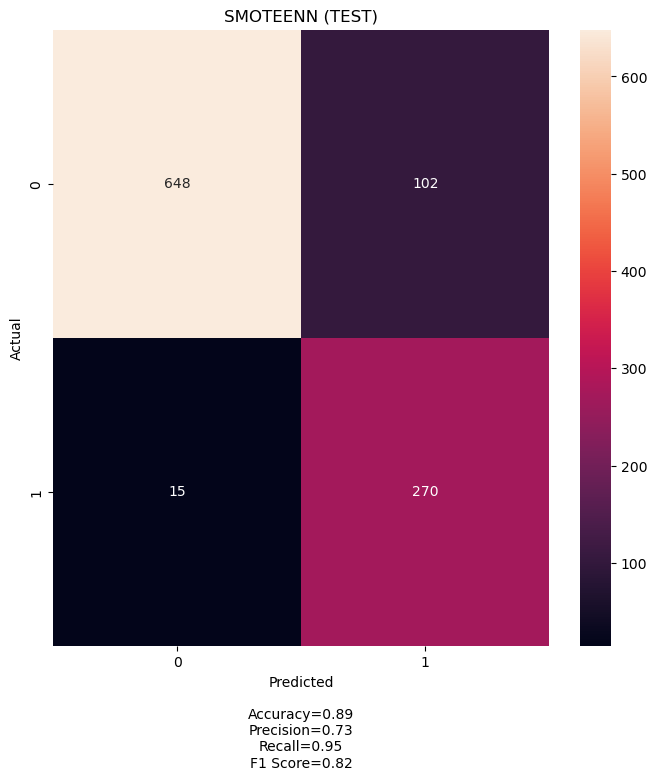

In [18]:
#Predict the data
y_train_pred = NB3.predict(x_train)
y_test_pred = NB3.predict(x_test)

#Visualizing the data
table1 = visualize_preds(table1, y_train, y_train_pred, title = 'SMOTEENN (TRAIN)')
table2 = visualize_preds(table2, y_test, y_test_pred, title = 'SMOTEENN (TEST)')

## 4) Naive Bayes Classification on SMOTETOMEK Train

In [19]:
#Assign x and y value
x_train = smote_tomek_train.drop(['Label'], axis = 1) # Remove the response variable
y_train = smote_tomek_train['Label']
x_test = test.drop(['Label'], axis = 1) # Remove the response variable
y_test = test['Label']

In [20]:
#Calculate the odds of an email being spam
print("The odds of an email being spam in SMOTETOMEK train dataset is\t: ",
      y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1]))

#Perform the logistics regression
NB4 = GaussianNB()

#Fit the data
NB4.fit(x_train, y_train)

#Print out the mean accuracy
print("The overall classification accuracy \t\t\t\t: ", NB4.score(x_test, y_test))

The odds of an email being spam in SMOTETOMEK train dataset is	:  0.5
The overall classification accuracy 				:  0.8898550724637682


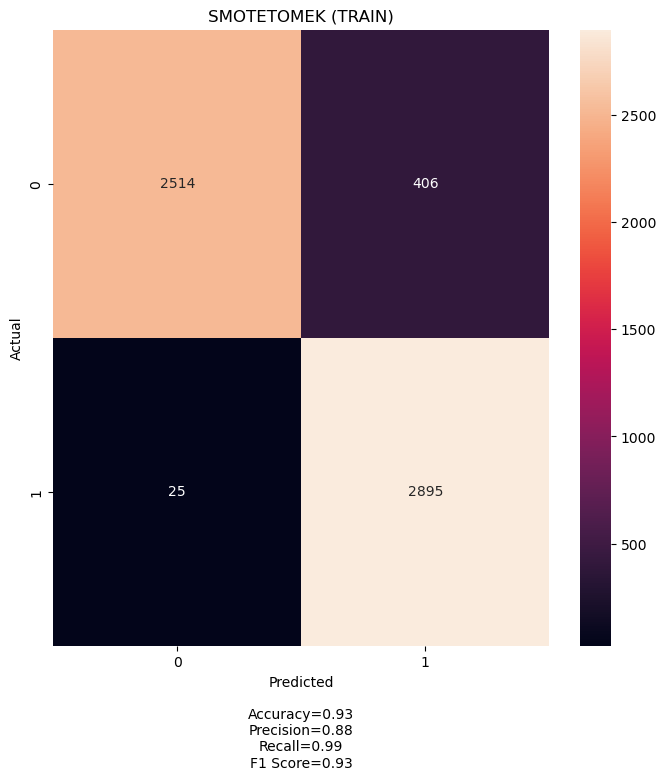

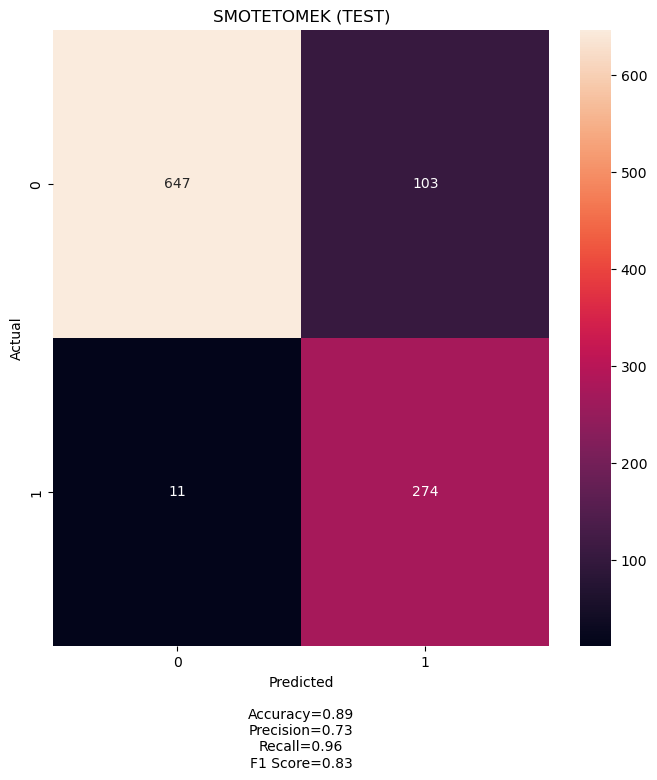

In [21]:
#Predict the data
y_train_pred = NB4.predict(x_train)
y_test_pred = NB4.predict(x_test)

#Visualizing the data
table1 = visualize_preds(table1, y_train, y_train_pred, title = 'SMOTETOMEK (TRAIN)')
table2 = visualize_preds(table2, y_test, y_test_pred, title = 'SMOTETOMEK (TEST)')

## Accuracy, Precision, Recall & F1 Score of Train Datasets

In [22]:
def draw_figure(table, row, title):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.ylim([0,1])
    splot = sb.barplot(x = ['Oversampling','Undersampling','SMOTEENN','SMOTETomek'], y = table.iloc[row,:])
    for p in splot.patches:
        if p.get_height() == 0:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        else:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, -12), 
                           textcoords = 'offset points')

In [23]:
table1 = table1.set_axis(['Oversampling','Undersampling','SMOTEENN','SMOTETomek'], axis = 1)
table1 = table1.set_axis(['Accuracy','Precision','Recall','F1 Score'], axis = 0)
table1

,Oversampling,Undersampling,SMOTEENN,SMOTETomek
Accuracy,0.922656,0.922656,0.972611,0.926199
Precision,0.869318,0.869318,0.955336,0.877007
Recall,0.994867,0.994867,0.995736,0.991438
F1 Score,0.927865,0.927865,0.975117,0.930719


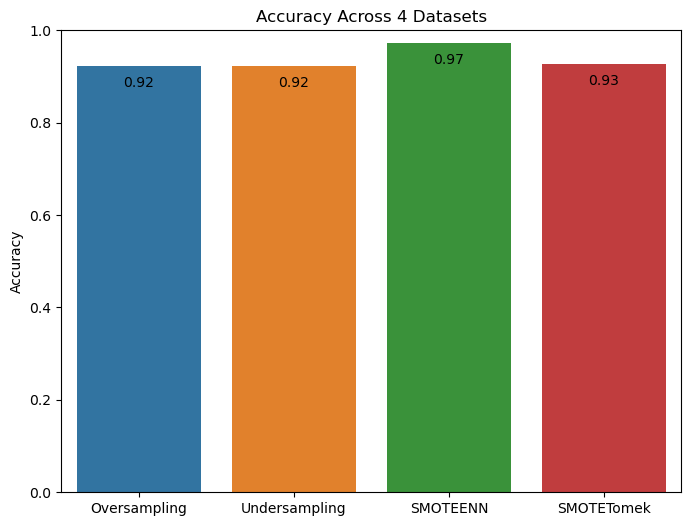

In [24]:
draw_figure(table1, 0, "Accuracy Across 4 Datasets")

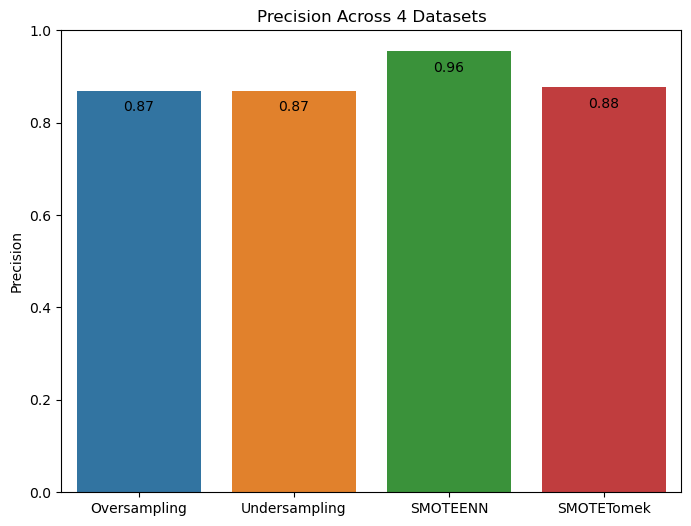

In [25]:
draw_figure(table1, 1, "Precision Across 4 Datasets")

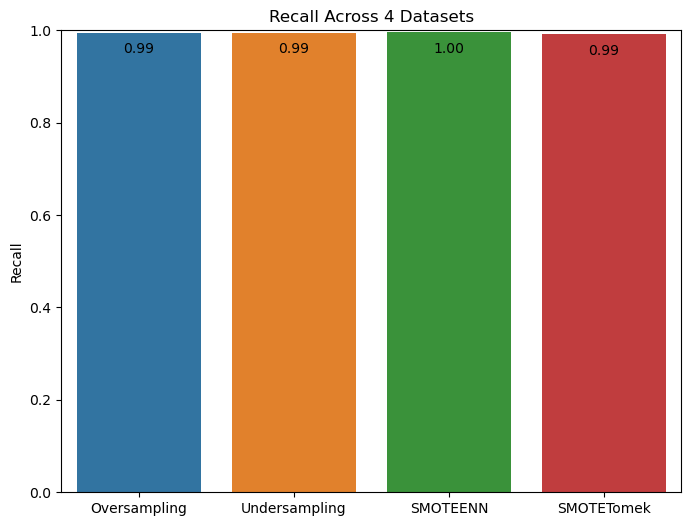

In [26]:
draw_figure(table1, 2, "Recall Across 4 Datasets")

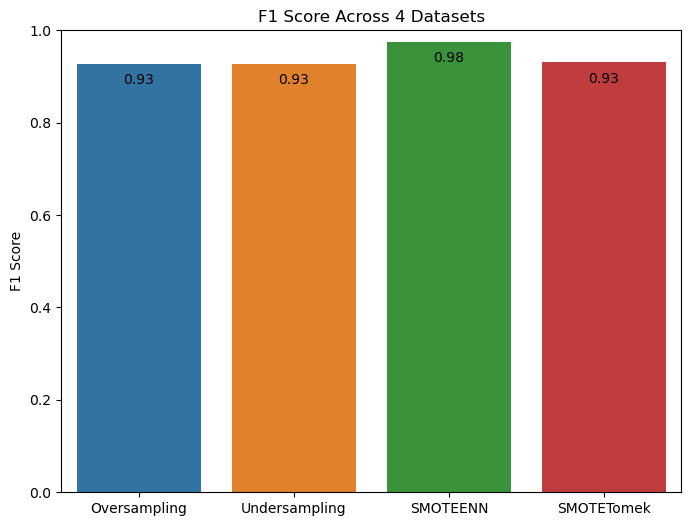

In [27]:
draw_figure(table1, 3, "F1 Score Across 4 Datasets")

## Accuracy, Precision, Recall & F1 Score of Test Datasets

In [28]:
table2 = table2.set_axis(['Oversampling','Undersampling','SMOTEENN','SMOTETomek'], axis = 1)
table2 = table2.set_axis(['Accuracy','Precision','Recall','F1 Score'], axis = 0)
table2

,Oversampling,Undersampling,SMOTEENN,SMOTETomek
Accuracy,0.885990,0.885990,0.886957,0.889855
Precision,0.716883,0.716883,0.725806,0.726790
Recall,0.968421,0.968421,0.947368,0.961404
F1 Score,0.823881,0.823881,0.821918,0.827795


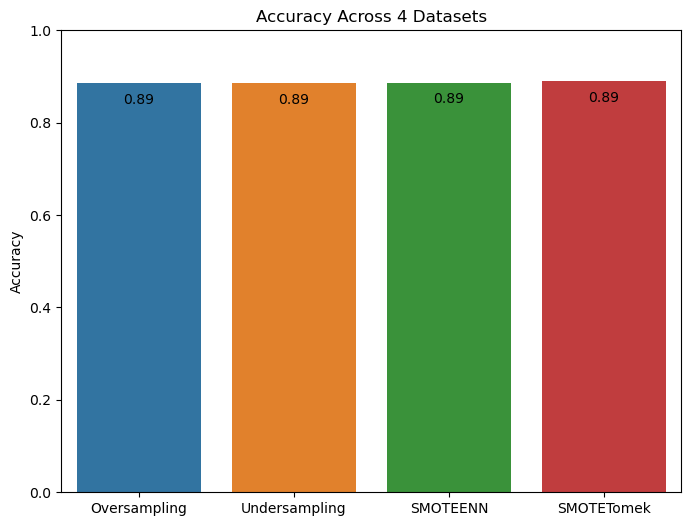

In [29]:
draw_figure(table2, 0, "Accuracy Across 4 Datasets")

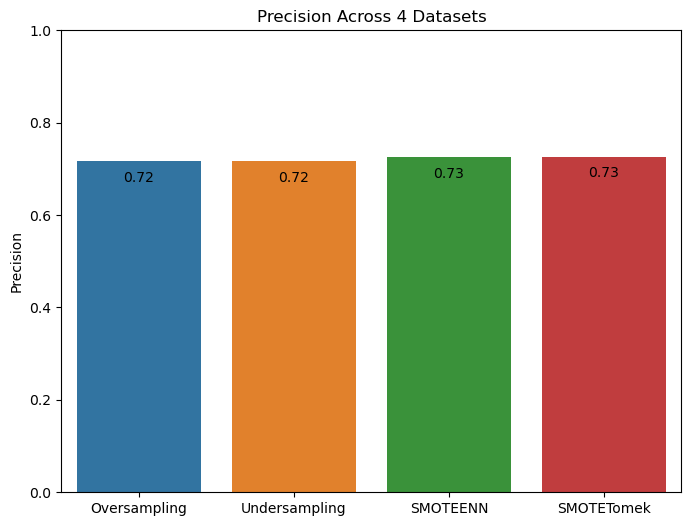

In [30]:
draw_figure(table2, 1, "Precision Across 4 Datasets")

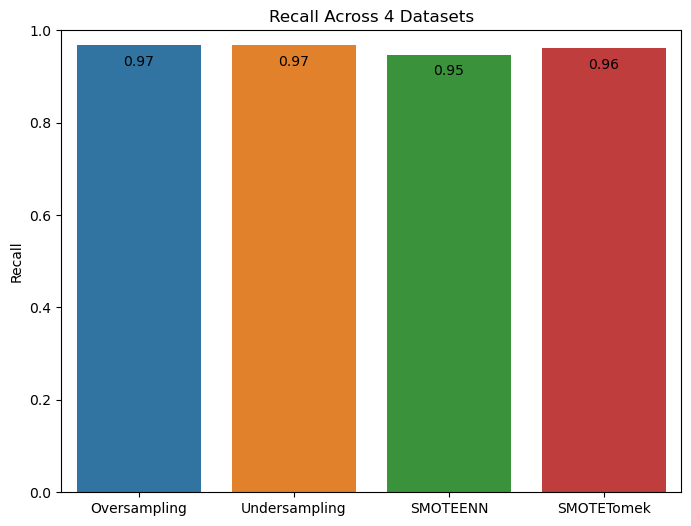

In [31]:
draw_figure(table2, 2, "Recall Across 4 Datasets")

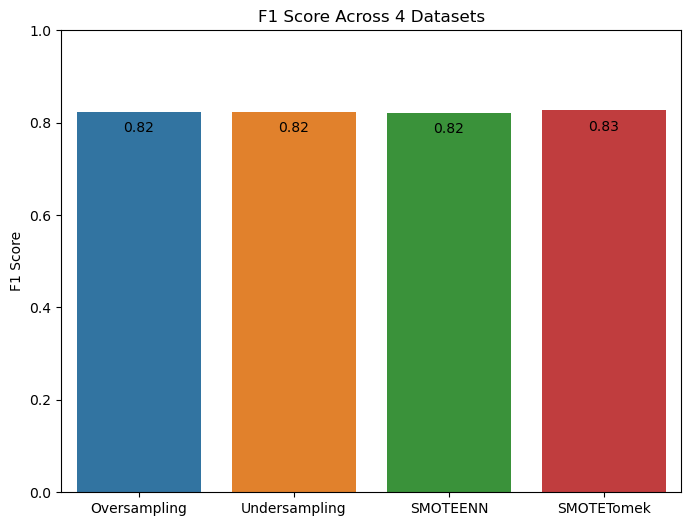

In [32]:
draw_figure(table2, 3, "F1 Score Across 4 Datasets")